In [10]:
import numpy as np
import sympy
from google.colab import files
import pandas as pd
from sympy import I, latex
from IPython.display import display, Latex
import matplotlib.pyplot as plt

/var/folders/7q/v9zczqnd565gsrjfmpdftbpr0000gn/T/ipykernel_6323/3682841399.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Занятие 9
# Алгебра
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [ ]:
z, r = sympy.symbols('z r')

def Display_Expr(k, expr, expr_val):
  display(Latex(fr"\left[{k}\right].\quad {expr} = {latex(expr_val)}"))

z_1 = 5*3**sympy.S.Half + 5 * I
z_2 = -3 + 3 * I
z_3 = -1 + I
z_4 = I
z_5 = sympy.S(12)/13 + I * sympy.S(5)/13

lst_expr = ["z_{1} \cdot z_{2}", "(z_{2} - 5z_{3})^6", "\\sqrt{\\frac{z_{4}}{z_{3}}}", "\\frac{z_{1}^2 + z_{3}}{13z_{5} - 2z_{2}}"]
lst_expr_val = [z_1 * z_2, (z_2 - 5 * z_3)**6, sympy.simplify(sympy.sqrt(z_4/z_3)), sympy.simplify((z_1**2 + z_3)/(13 * z_5 - 2 * z_2))]

for i in range(len(lst_expr)):
  Display_Expr(i + 1, lst_expr[i], lst_expr_val[i])

### Задание  2.
Вычисления Примера 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
z_1 = complex(5 * 3**sympy.S.Half, 5)
z_2 = complex(-3, 3)
z_3 = complex(-1, 1)
z_4 = complex(0, 1)
z_5 = complex(sympy.S(12)/13, sympy.S(5)/13)

lst_expr_val = [z_1 * z_2, (z_2 - 5 * z_3)**6, sympy.sqrt(z_4/z_3), (z_1**2 + z_3)/(13 * z_5 - 2 * z_2)]

for i in range(len(lst_expr)):
  Display_Expr(i + 1, lst_expr[i], lst_expr_val[i])

### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

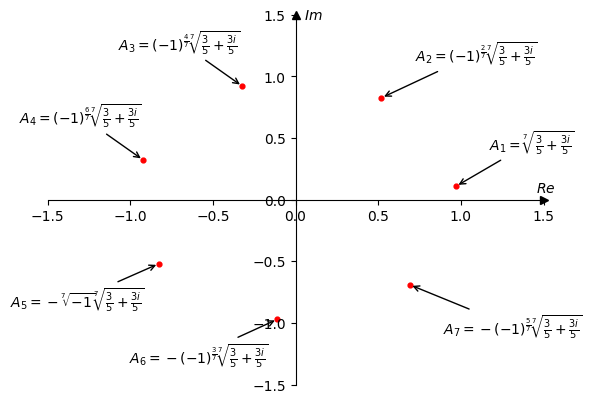

In [136]:
z_alg = sympy.S(3)/5 + I * sympy.S(3)/5
lst_roots = [(sympy.root(z_alg, 7, k)) for k in range(7)]
lst_roots_re = [sympy.re(val) for val in lst_roots]
lst_roots_im = [sympy.im(val) for val in lst_roots]

ax = plt.gca()
ax.scatter(lst_roots_re, lst_roots_im, s = 12, color = "red")

for i in range(len(lst_roots)):
  x, y = (lst_roots_re[i], lst_roots_im[i])
  x_delt, y_delt = (0, 0)
  if (x > 0 and y > 0):
    x_delt, y_delt = (0.2, 0.3)
  elif (x < 0 and y > 0):
    x_delt, y_delt = (-0.75, 0.3)
  elif (x < 0 and y < 0):
    x_delt, y_delt = (-0.9, -0.35)
  else:
    x_delt, y_delt = (0.2, -0.4)
  ax.annotate(f'$A_{i + 1} = {sympy.latex(lst_roots[i])}$', xycoords='data',
                xy = (x, y), xytext = (x + x_delt, y + y_delt), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

x_lim = (-1.5,1.5)
y_lim = (-1.5, 1.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$Im$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.55)
ax.yaxis.set_label_coords(0.535, 0.980)

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

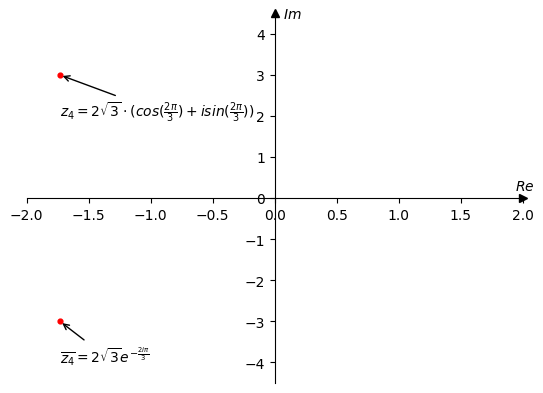

In [137]:
lst_nums = [-3**sympy.S.Half + 3 * I, -3**sympy.S.Half - 3 * I]
lst_nums_re = [sympy.re(num) for num in lst_nums]
lst_nums_im = [sympy.im(num) for num in lst_nums]

ax = plt.gca()
ax.scatter(lst_nums_re, lst_nums_im, s = 12, color = "red")

for i in range(len(lst_nums)):
  x,y = (lst_nums_re[i], lst_nums_im[i])
  phi = sympy.functions.arg(lst_nums[i])
  r = sympy.functions.Abs(lst_nums[i])
  if (i == 0):
    dot_text = f'$z_{4} = {latex(r)} \cdot (cos({latex(phi)}) + isin({latex(phi)})) $'
  else:
    dot_text = r'$\overline{z_{4}} = $' + f"${sympy.latex(r * (sympy.E ** (phi * I)))}$"
  ax.annotate(dot_text, xycoords='data',
                xy = (x, y), xytext = (x , y - 1), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))


x_lim = (-2,2)
y_lim = (-4.5, 4.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$Im$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.55)
ax.yaxis.set_label_coords(0.535, 0.980)

#### Задание  5*.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел.

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$,
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$.

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность в формате float модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и преобразовывать результат в формат float).

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

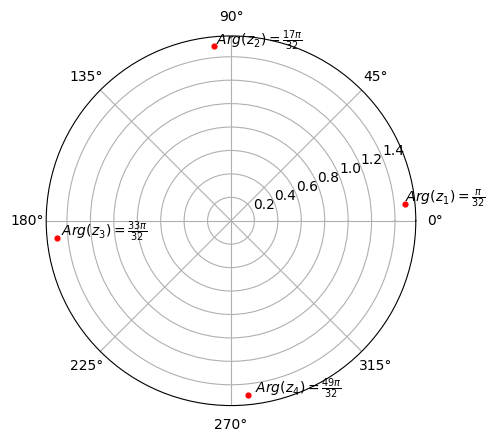

In [138]:
z_arg = sympy.S(sympy.pi)/8
z_compl = 5 * (sympy.cos(z_arg) + I * sympy.sin(z_arg))
z_mod = sympy.functions.Abs(z_compl)


lst_compl_roots = [z_mod**(sympy.S(1)/4) * (sympy.cos((z_arg + 2 * sympy.pi * k)/4) + I * sympy.sin((z_arg + 2 * sympy.pi * k)/4)) for k in range(4)]
lst_compl_roots_sympy = [sympy.expand_complex(sympy.root(z_compl, 4, k)) for k in range(4)]
lst_difference_vals = [float(sympy.Abs(lst_compl_roots[i] - lst_compl_roots_sympy[i])) for i in range(len(lst_compl_roots))]

display(Latex(fr"\bullet \text{{Корни комплексного числа через формулу нахождения корней:}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_compl_roots))])).format(*map(latex, lst_compl_roots))))
print()
display(Latex(fr"\bullet \text{{Корни комплексного числа через метод sympy.root :}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_compl_roots_sympy))])).format(*map(latex, lst_compl_roots_sympy))))
print()
display(Latex(fr"\bullet \text{{Разница между значениями полученными с помощью формулы и метода:}}"))
display(Latex((r',\ '.join([fr'\Delta r_{k + 1} = {{{k}}}' for k in range(len(lst_difference_vals))])).format(*map(latex, lst_difference_vals))))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

for i in range(len(lst_compl_roots)):
  cur_num = lst_compl_roots[i]
  cur_phi = (z_arg + 2 * sympy.pi * i)/4
  cur_r = sympy.simplify(sympy.functions.Abs(cur_num))
  ax.scatter(cur_phi, cur_r, color = "red", s = 12)
  ax.annotate(f"$Arg(z_{i + 1}) = {latex(cur_phi)}$", xy = (cur_phi, cur_r), xytext = (cur_phi, cur_r), textcoords='offset points')


#### Задание  6*.
Считать из файла "complex_numbers.xlsx" комплексные числа (откройте файл, обратите внимание на подписи строк и столбцов, имя листа).
Вывести на экран  считанные числа в алгебраической  форме, их модули и аргументы. Дописать в файл листы "abs" и "arg" с названиями строк в виде алгебраической формы комплексного числа (например, $2-3i$) и столбцом "abs" и "arg" соответсвенно со значениями модулей и аргументов чисел, округленными до 2 знаков после запятой. Округлять можно, например, с помощью round из Python.

**Указание:** построить по считанным из файла значениям вещественной и мнимой части комплексные числа sympy, вычислить приближенно их модули и аргументы средствами sympy, затем округлить.

In [ ]:
uploaded_files_dct = files.upload()
file_name = [name for name in uploaded_files_dct.keys()][0]
compl_nums_df = pd.read_excel(file_name, sheet_name = "a+ib")


lst_compl_names_idx = [compl_nums_df["number"].iloc[i] for i in range(len(compl_nums_df))]
lst_compl_vals = [compl_nums_df["re"].iloc[i] + I * compl_nums_df["im"].iloc[i] for i in range(len(compl_nums_df))]
lst_compl_abs = [sympy.functions.Abs(num) for num in lst_compl_vals]
lst_compl_args = [sympy.functions.arg(num) for num in lst_compl_vals]
lst_compl_abs_rounded = [round(val, 2) for val in lst_compl_abs]
lst_compl_args_rounded = [round(val, 2) for val in lst_compl_args]


display(Latex(fr"\text{{Алгебраическая форма считанных комплексных чисел:}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_compl_vals))])).format(*map(latex, lst_compl_vals))))
print()
display(Latex(fr"\text{{Модули комплексных чисел: }}"))
display(Latex((r',\ '.join([fr'Abs(r_{k + 1}) = {{{k}}}' for k in range(len(lst_compl_abs))])).format(*map(latex, lst_compl_abs))))
print()
display(Latex(fr"\text{{Аргументы комплексных чисел: }}"))
display(Latex((r',\ '.join([fr'Arg(r_{k + 1}) = {{{k}}}' for k in range(len(lst_compl_args ))])).format(*map(latex, lst_compl_args ))))

dct_data_abs = {"value": lst_compl_vals, "abs": lst_compl_abs_rounded}
compl_abs_df = pd.DataFrame(data = dct_data_abs, index = lst_compl_names_idx)
# compl_abs_df["abs"] = compl_abs_df["abs"].astype(float)
dct_data_args = {"value": lst_compl_vals, "arg": lst_compl_args_rounded}
compl_arg_df = pd.DataFrame(data = dct_data_args, index = lst_compl_names_idx)
# compl_arg_df["arg"] = compl_arg_df["arg"].astype(float)

with pd.ExcelWriter(file_name, mode = 'a') as writer:
  compl_abs_df.to_excel(writer, sheet_name = "abs")
  compl_arg_df.to_excel(writer, sheet_name = "arg")

files.download(file_name)

### Индивидуальное задание.
Составить уравнение 3 степени с переменной $z$, корнями которого являются числа $z_1$, $z_2$ и $z_3$, вывести уравнение на экран (скобки должны быть раскрыты!).

Решить полученное уравнение с использованием sympy.roots.
Корни уравнения вывести на экран в алгебраической форме.

Преобразовать **полученные** корни уравнения в комплексные числа Python (не sympy!), вывести на экран комплексно-сопряженные к ним числа.

Затем вывести на экран на отдельной строчке модули всех чисел и на отдельной строчке аргументы, все числа округлить до 3 знаков после запятой, т.е. не более 3 знаков после запятой.

Вариант №43

$z_1 = 5 + i$ , $z_2 = 8 + 6 i$ , $z_3 = 5 + 2 i$

In [ ]:
z = sympy.Symbol('z')
z_1 = 5 + I
z_2 = 8 + 6 * I
z_3 = 5 + 2 * I

expr_compl = sympy.Eq(sympy.simplify(sympy.expand((z - z_1) * (z - z_2) * (z - z_3))), 0)
lst_roots = sympy.roots(expr_compl)
lst_roots_py = [complex(sympy.re(num), sympy.im(num)) for num in lst_roots]
lst_conj_roots_py = [num.conjugate() for num in lst_roots_py]
lst_abs_all = [round(sympy.functions.Abs(num), 3) for num in lst_roots]
lst_abs_all.extend([round((num.real**2 + num.imag**2)**(0.5), 3) for num in lst_conj_roots_py])
lst_arg_all = [round(sympy.functions.arg(num), 3) for num in lst_roots]
lst_arg_all.extend([round(sympy.functions.arg(num.real + I * num.imag), 3) for num in lst_conj_roots_py])

display(Latex(fr"\text{{Уравнение : }} {latex(expr_compl)}"))
display(Latex(fr"\text{{Корни уравнения :}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_roots))])).format(*map(latex, lst_roots))))
display(Latex(fr"\text{{Корни уравнения в типе данных python:}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_roots_py))])).format(*map(latex, lst_roots_py))))
display(Latex(fr"\text{{Комплексно-сопряженные к ним числа:}}"))
display(Latex((r',\ '.join([fr'r_{k + 4} = {{{k}}}' for k in range(len(lst_conj_roots_py ))])).format(*map(latex, lst_conj_roots_py ))))
display(Latex(fr"\text{{Модули всех чисел:}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_abs_all))])).format(*map(latex, lst_abs_all ))))
display(Latex(fr"\text{{Аргументы всех чисел:}}"))
display(Latex((r',\ '.join([fr'r_{k + 1} = {{{k}}}' for k in range(len(lst_arg_all))])).format(*map(latex, lst_arg_all ))))